In [117]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [118]:
median_price = 'City_MedianListingPrice_AllHomes.csv'
price_df = pd.read_csv(median_price)
price_df.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-January,2010- February,2010- March,2010- April,2010- May,...,2018- July,2018- August,2018- September,2018- October,2018- November,2018- December,2019-January,2019- February,2019- March,2019- April
0,New York,NY,New York-Newark-Jersey City,Queens County,1,459000.000,450000.000,429999.000,435000.000,449000.000,...,799000.000,779000.000,795000.000,798000.000,795000.000,798000.000,789000.000,790000.000,798000.000,799000.000
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,434900.000,419000.000,429000.000,429000.000,429000.000,...,799900.000,799000.000,799000.000,799844.000,799894.000,799000.000,799000.000,799500.000,800000.000,829994.500
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,148341.500,150000.000,154950.000,155000.000,155000.000,...,297000.000,289990.000,294700.000,293500.000,292850.000,289449.500,289900.000,290000.000,298995.000,300000.000
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,269725.000,274500.000,272000.000,271950.000,269000.000,...,325000.000,319999.000,325000.000,324900.000,319900.000,315000.000,324999.000,330000.000,339900.000,349900.000
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,145000.000,147000.000,149000.000,149900.000,150200.000,...,239900.000,237223.000,237992.500,236536.000,239500.000,239999.000,240999.000,243999.000,243500.000,245000.000


In [119]:
price_df.columns

Index(['RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '2010-January', '2010- February', '2010- March', '2010- April',
       '2010- May',
       ...
       '2018- July', '2018- August', '2018- September', '2018- October',
       '2018- November', '2018- December', '2019-January', '2019- February',
       '2019- March', '2019- April'],
      dtype='object', length=117)

In [120]:
reduced_price_df = price_df.loc[:, ["RegionName", "State", "Metro", "CountyName","2018-January","2018- February","2018- March","2018- April","2018- June","2018- July", "2018- August", "2018- September", "2018- October",
       "2018- November", "2018- December", "2019-January", "2019- February",
       "2019- March", "2019- April"]]
reduced_price_df

,RegionName,State,Metro,CountyName,2018-January,2018- February,2018- March,2018- April,2018- June,2018- July,2018- August,2018- September,2018- October,2018- November,2018- December,2019-January,2019- February,2019- March,2019- April
0,New York,NY,New York-Newark-Jersey City,Queens County,799000.000,799000.000,795000.000,790000.000,799000.000,799000.000,779000.000,795000.000,798000.000,795000.000,798000.000,789000.000,790000.000,798000.000,799000.000
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,759000.000,779950.000,787850.000,799000.000,799990.000,799900.000,799000.000,799000.000,799844.000,799894.000,799000.000,799000.000,799500.000,800000.000,829994.500
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,289900.000,295000.000,299900.000,299995.000,299900.000,297000.000,289990.000,294700.000,293500.000,292850.000,289449.500,289900.000,290000.000,298995.000,300000.000
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,294850.000,309900.000,324900.000,329900.000,325000.000,325000.000,319999.000,325000.000,324900.000,319900.000,315000.000,324999.000,330000.000,339900.000,349900.000
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,233500.000,231499.500,229999.000,235000.000,240000.000,239900.000,237223.000,237992.500,236536.000,239500.000,239999.000,240999.000,243999.000,243500.000,245000.000
5,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,195000.000,199800.000,204900.000,214900.000,225000.000,225000.000,219900.000,219000.000,219000.000,219000.000,219000.000,215000.000,219000.000,224900.000,235000.000
6,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,275000.000,279900.000,282900.000,289900.000,287490.000,284945.000,280000.000,279900.000,280000.000,278000.000,275000.000,279000.000,278900.000,280000.000,285000.000
7,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,285000.000,289000.000,289000.000,290000.000,295000.000,299894.000,307000.000,304888.000,300000.000,300000.000,299998.000,299888.000,299000.000,298894.000,299900.000
8,San Diego,CA,San Diego-Carlsbad,San Diego County,629000.000,638000.000,649000.000,659000.000,699900.000,699000.000,689000.000,685000.000,685000.000,680000.000,679900.000,689000.000,689000.000,699000.000,705000.000
9,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,374900.000,395000.000,399000.000,400000.000,399000.000,395000.000,380000.000,382000.000,385000.000,387000.000,375000.000,370000.000,379949.000,389700.000,399900.000


In [121]:
columns=["RegionName", "State", "Metro", "CountyName","2018-January","2018- February","2018- March","2018- April","2018- June","2018- July", "2018- August", "2018- September", "2018- October",
       "2018- November", "2018- December", "2019-January", "2019- February",
       "2019- March", "2019- April"]
price_in_state = reduced_price_df.loc[reduced_price_df["State"] == "NY",  columns]
price_in_state.head()

,RegionName,State,Metro,CountyName,2018-January,2018- February,2018- March,2018- April,2018- June,2018- July,2018- August,2018- September,2018- October,2018- November,2018- December,2019-January,2019- February,2019- March,2019- April
0,New York,NY,New York-Newark-Jersey City,Queens County,799000.000,799000.000,795000.000,790000.000,799000.000,799000.000,779000.000,795000.000,798000.000,795000.000,798000.000,789000.000,790000.000,798000.000,799000.000
64,Islip,NY,New York-Newark-Jersey City,Suffolk County,349990.000,353000.000,359000.000,369000.000,389000.000,387700.000,379900.000,389000.000,379000.000,374995.000,370000.000,373517.500,376500.000,384999.500,399000.000
90,Buffalo,NY,Buffalo-Cheektowaga-Niagara Falls,Erie County,80000.000,79900.000,79900.000,79900.000,98750.000,99000.000,99888.000,99900.000,99997.000,99900.000,92500.000,89900.000,94900.000,93500.000,108000.000
130,Rochester,NY,Rochester,Monroe County,59900.000,60000.000,64900.000,69900.000,79000.000,74950.000,73000.000,70000.000,74900.000,74900.000,69900.000,74900.000,79000.000,79900.000,79900.000
229,Syracuse,NY,Syracuse,Onondaga County,70000.000,74000.000,78600.000,83000.000,89900.000,89900.000,89100.000,84900.000,84900.000,79900.000,75000.000,74900.000,84900.000,84900.000,92000.000


In [122]:
price_in_New_York=reduced_price_df.loc[reduced_price_df["RegionName"] == "New York",  columns]
price_in_New_York.head()

,RegionName,State,Metro,CountyName,2018-January,2018- February,2018- March,2018- April,2018- June,2018- July,2018- August,2018- September,2018- October,2018- November,2018- December,2019-January,2019- February,2019- March,2019- April
0,New York,NY,New York-Newark-Jersey City,Queens County,799000.000,799000.000,795000.000,790000.000,799000.000,799000.000,779000.000,795000.000,798000.000,795000.000,798000.000,789000.000,790000.000,798000.000,799000.000


In [123]:
x_axis = np.arange(len(price_in_New_York))
tick_locations = [value for value in x_axis]

In [124]:
median_price_cleaned = 'median_listing_price_cleaned.csv'
price_cleaned_df = pd.read_csv(median_price_cleaned)
price_cleaned_df.head()

,Date,Median Listing Price
0,2018-January,799000
1,2018- February,799000
2,2018- March,795000
3,2018- April,790000
4,2018- May,815000


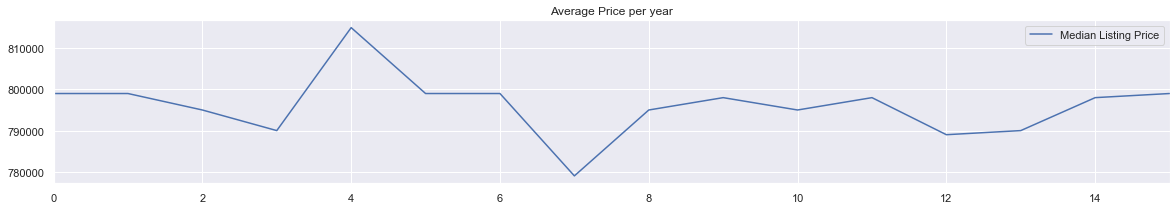

<Figure size 432x288 with 0 Axes>

In [125]:
price_cleaned_df.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Average Price per year")

plt.show()
plt.tight_layout()